<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_home_credit_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 【問題1】コンペティション内容の確認

### ①何を学習し、何を予測するのか

債務者の個人情報（家族構成、収入、職業、学歴、など）120項目をもとに、債務不履行になるリスクを予測する。

### ②どのようなファイルを作りKaggleに提出するか

債務者ごとに、債務不履行になる確率を0～1の間の数字で評価した一覧表を作成し、Kaggleに提出する。

### ③提出されたものはどういった指標値で評価されるのか

予測した債務不履行の確率と実際の債務不履行から求めた、真陽性率と偽陽性率をもとに描かれた、ROC曲線から算出したAUCにより評価される。

## 【問題2】学習と検証

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [ ]:
# data読み込み
DATA_DIR='C:/Users/es/Documents/Python Scripts/1.Jan/Week4/'
data = pd.read_csv(f'{DATA_DIR}application_train.csv')
# dataデータの先頭5行を表示
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# data読み込み
DATA_DIR='C:/Users/es/Documents/Python Scripts/1.Jan/Week4/'
data2 = pd.read_csv(f'{DATA_DIR}application_test.csv')
# dataデータの先頭5行を表示
data2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
# 項目ごとの欠損値の数と全行に対する割合を表示
for col_name in data.columns:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / len(data) * 100))

SK_ID_CURR : missing 0 , missing_ratio 0.0%
TARGET : missing 0 , missing_ratio 0.0%
NAME_CONTRACT_TYPE : missing 0 , missing_ratio 0.0%
CODE_GENDER : missing 0 , missing_ratio 0.0%
FLAG_OWN_CAR : missing 0 , missing_ratio 0.0%
FLAG_OWN_REALTY : missing 0 , missing_ratio 0.0%
CNT_CHILDREN : missing 0 , missing_ratio 0.0%
AMT_INCOME_TOTAL : missing 0 , missing_ratio 0.0%
AMT_CREDIT : missing 0 , missing_ratio 0.0%
AMT_ANNUITY : missing 12 , missing_ratio 0.0%
AMT_GOODS_PRICE : missing 278 , missing_ratio 0.1%
NAME_TYPE_SUITE : missing 1292 , missing_ratio 0.4%
NAME_INCOME_TYPE : missing 0 , missing_ratio 0.0%
NAME_EDUCATION_TYPE : missing 0 , missing_ratio 0.0%
NAME_FAMILY_STATUS : missing 0 , missing_ratio 0.0%
NAME_HOUSING_TYPE : missing 0 , missing_ratio 0.0%
REGION_POPULATION_RELATIVE : missing 0 , missing_ratio 0.0%
DAYS_BIRTH : missing 0 , missing_ratio 0.0%
DAYS_EMPLOYED : missing 0 , missing_ratio 0.0%
DAYS_REGISTRATION : missing 0 , missing_ratio 0.0%
DAYS_ID_PUBLISH : missing 0

In [ ]:
# 5つ以上欠損値がある特徴量（列）は削除する。
data=data.dropna(thresh=len(data)-4, axis=1)

# 欠損値があるサンプル（行）は削除する。
data = data.dropna(how='any')

In [ ]:
# 項目ごとの欠損値の数と全行に対する割合を表示
for col_name in data.columns:
  missing_num = sum(pd.isnull(data[col_name]))
  print('{} : missing {} , missing_ratio {:.1f}%'.format(col_name, missing_num , missing_num / len(data) * 100))

SK_ID_CURR : missing 0 , missing_ratio 0.0%
TARGET : missing 0 , missing_ratio 0.0%
NAME_CONTRACT_TYPE : missing 0 , missing_ratio 0.0%
CODE_GENDER : missing 0 , missing_ratio 0.0%
FLAG_OWN_CAR : missing 0 , missing_ratio 0.0%
FLAG_OWN_REALTY : missing 0 , missing_ratio 0.0%
CNT_CHILDREN : missing 0 , missing_ratio 0.0%
AMT_INCOME_TOTAL : missing 0 , missing_ratio 0.0%
AMT_CREDIT : missing 0 , missing_ratio 0.0%
NAME_INCOME_TYPE : missing 0 , missing_ratio 0.0%
NAME_EDUCATION_TYPE : missing 0 , missing_ratio 0.0%
NAME_FAMILY_STATUS : missing 0 , missing_ratio 0.0%
NAME_HOUSING_TYPE : missing 0 , missing_ratio 0.0%
REGION_POPULATION_RELATIVE : missing 0 , missing_ratio 0.0%
DAYS_BIRTH : missing 0 , missing_ratio 0.0%
DAYS_EMPLOYED : missing 0 , missing_ratio 0.0%
DAYS_REGISTRATION : missing 0 , missing_ratio 0.0%
DAYS_ID_PUBLISH : missing 0 , missing_ratio 0.0%
FLAG_MOBIL : missing 0 , missing_ratio 0.0%
FLAG_EMP_PHONE : missing 0 , missing_ratio 0.0%
FLAG_WORK_PHONE : missing 0 , missi

まずは前週の「信用情報の分析」において、ヒートマップによりターゲットと相関関係が強かった上位9個の特徴量を採用してみる。\
①DAYS_BIRTH\
②REGION_RATING_CLIENT_W_CITY\
③REGION_RATING_CLIENT\
④DAYS_LAST_PHONE_CHANGE\
⑤DAYS_ID_PUBLISH\
⑥REG_CITY_NOT_WORK_CITY\
⑦FLAG_EMP_PHONE\
⑧DAYS_EMPLOYED\
➈REG_CITY_NOT_LIVE_CITY

In [ ]:
X = data.loc[:,['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY']]

In [ ]:
y = data.loc[:,['TARGET']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # ランダムフォレストモデルのインスタンスを作成
rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習

<ipython-input-442-aca106f0a6e1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習


RandomForestClassifier()

In [ ]:
y_proba = rf.predict_proba(X_val)

In [ ]:
from sklearn.metrics import auc, confusion_matrix

In [ ]:
def get_conf_matrix(threshold, y_proba, y_val):
    y_pred = (y_proba[:, 1] > threshold).astype(int)
    labels = [0, 1]
    confusion_m = confusion_matrix(y_val, y_pred, labels=labels)
    confusion_df = pd.DataFrame(confusion_m, columns=labels, index=labels)
    confusion_df.rename(columns={0: "predicted_0", 1: "predicted_1"},
                        index={0: "actual_0", 1: "actual_1"}, inplace=True)
    return confusion_df

In [ ]:
get_conf_matrix(0.5, y_proba, y_val)

,predicted_0,predicted_1
actual_0,70550,63
actual_1,6241,23


In [ ]:
model_proba = np.stack([np.arange(len(X_val)), y_proba[:,1], np.array(y_val).reshape(-1)],1)

In [ ]:
model_proba = pd.DataFrame(model_proba, columns=["ID", "predict_proba","target"])

In [ ]:
model_proba

,ID,predict_proba,target
0,0.0,0.21,0.0
1,1.0,0.03,0.0
2,2.0,0.04,0.0
3,3.0,0.01,0.0
4,4.0,0.05,0.0
...,...,...,...
76872,76872.0,0.06,0.0
76873,76873.0,0.02,0.0
76874,76874.0,0.02,0.0
76875,76875.0,0.01,0.0


In [ ]:
def get_tpr_fpr(df):
    y_test = df["target"]
    fpr = []
    tpr = []
    
    for thresh in np.arange(0, 1.1, 0.1):
        y_pred = (df["predict_proba"] > thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).flatten()
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
        
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.plot([0, 1],[0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

    return tpr, fpr

## 【問題3】テストデータに対する推定

In [ ]:
X_Id = data2.loc[:,['SK_ID_CURR']]

In [ ]:
X_test = data2.loc[:,['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY']]

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
X_Id = np.array(X_Id)
submission = pd.DataFrame()
submission['SK_ID_CURR'] = X_Id.reshape(X_Id.shape[0])
submission['TARGET'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub.csv', index=False)

![image.png](attachment:image.png)

あまり正しく予測できていない！！

## 【問題4】特徴量エンジニアリング

特徴量エンジニアリング①

前週の「信用情報の分析」において、債務不履行者の増減に影響を与えた特徴量を採用してみる。\
①CODE_GENDER(ダミー変数化)\
②NAME_INCOME_TYPE(ダミー変数化)\
③NAME_EDUCATION_TYPE(ダミー変数化)\
④NAME_FAMILY_STATUS(ダミー変数化)\
⑤CNT_CHILDREN\
⑥NAME_HOUSING_TYPE(ダミー変数化)\
⑦DAYS_EMPLOYED\
⑧DAYS_LAST_PHONE_CHANGE

In [ ]:
X = data.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
clm = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
X = pd.get_dummies(data=X, columns=clm)
X = pd.concat([X,data.CNT_CHILDREN,data.DAYS_EMPLOYED,data.DAYS_LAST_PHONE_CHANGE], axis = 1)

In [ ]:
# X.columnsから、学習データにはあるがテストデータにはない項目を削除する。
# この2項目は、件数も少ない。
# ①CODE_GENDER_XNA・・・4件
# ②NAME_INCOME_TYPE_Maternity leave・・・5件

In [ ]:
X = X.drop('CODE_GENDER_XNA', axis=1)
X = X.drop('NAME_INCOME_TYPE_Maternity leave', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
rf = RandomForestClassifier() # ランダムフォレストモデルのインスタンスを作成
rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習

<ipython-input-460-e74e95590262>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習


RandomForestClassifier()

In [ ]:
y_proba = rf.predict_proba(X_val)

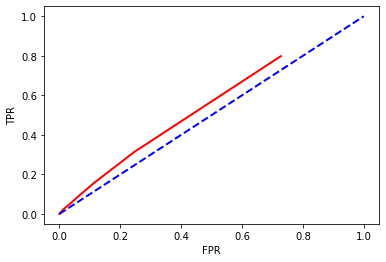

0.423398421122569

In [ ]:
model_proba = np.stack([np.arange(len(X_val)), y_proba[:,1], np.array(y_val).reshape(-1)],1)
model_proba = pd.DataFrame(model_proba, columns=["ID", "predict_proba","target"])
get_tpr_fpr(model_proba)
auc(fpr, tpr)

In [ ]:
X_Id = data2.loc[:,['SK_ID_CURR']]
X_dummy = data2.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
X_dummy = pd.get_dummies(data=X_dummy, columns=clm)
X_test = pd.concat([X_dummy,data2.CNT_CHILDREN,data2.DAYS_EMPLOYED,data2.DAYS_LAST_PHONE_CHANGE], axis = 1)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
X_Id = np.array(X_Id)
submission = pd.DataFrame()
submission['SK_ID_CURR'] = X_Id.reshape(X_Id.shape[0])
submission['TARGET'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub.csv', index=False)

![image.png](attachment:image.png)

スコアが若干良くなった！！

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

特徴量エンジニアリング②

さらに、TARGETに影響を与えうる項目をグラフ表示しながら探し、特徴量に加えてみる。

In [ ]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


C:\Users\es\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

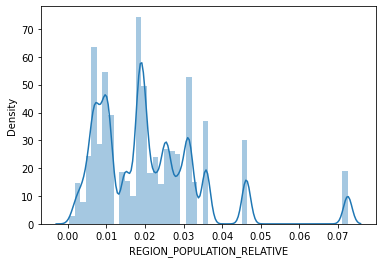

In [ ]:
sns.distplot(data['REGION_POPULATION_RELATIVE'])

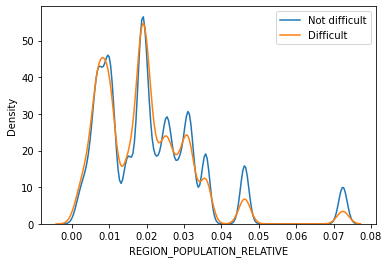

In [ ]:
t0 = data.loc[data["TARGET"]==0]
t1 = data.loc[data["TARGET"]==1]

sns.kdeplot(t0["REGION_POPULATION_RELATIVE"],label="Not difficult")
sns.kdeplot(t1["REGION_POPULATION_RELATIVE"],label="Difficult")
plt.legend()

親戚がそばに少ないほど、不履行が発生しやすそうである。特徴量として採用する。

In [ ]:
# 学習用、検証用データの作成
# 特徴量を作成する。
X = data.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
clm = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
X = pd.get_dummies(data=X, columns=clm)
X = pd.concat([X,data.CNT_CHILDREN,data.DAYS_EMPLOYED,data.DAYS_LAST_PHONE_CHANGE,data.REGION_POPULATION_RELATIVE], axis = 1)
# X.columnsから、学習データにはあるがテストデータにはない項目を削除する。
# この2項目は、件数も少ない。
# ①CODE_GENDER_XNA・・・4件
# ②NAME_INCOME_TYPE_Maternity leave・・・5件
X = X.drop('CODE_GENDER_XNA', axis=1)
X = X.drop('NAME_INCOME_TYPE_Maternity leave', axis=1)
# データを学習用と検証用に分割する。
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
rf = RandomForestClassifier() # ランダムフォレストモデルのインスタンスを作成
rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習

<ipython-input-471-e74e95590262>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習


RandomForestClassifier()

In [ ]:
y_proba = rf.predict_proba(X_val)

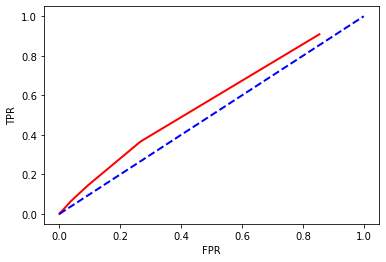

0.423398421122569

In [ ]:
model_proba = np.stack([np.arange(len(X_val)), y_proba[:,1], np.array(y_val).reshape(-1)],1)
model_proba = pd.DataFrame(model_proba, columns=["ID", "predict_proba","target"])
get_tpr_fpr(model_proba)
auc(fpr, tpr)

In [ ]:
X_Id = data2.loc[:,['SK_ID_CURR']]
X_dummy = data2.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
X_dummy = pd.get_dummies(data=X_dummy, columns=clm)
X_test = pd.concat([X_dummy,data2.CNT_CHILDREN,data2.DAYS_EMPLOYED,data2.DAYS_LAST_PHONE_CHANGE,data2.REGION_POPULATION_RELATIVE], axis = 1)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
X_Id = np.array(X_Id)
submission = pd.DataFrame()
submission['SK_ID_CURR'] = X_Id.reshape(X_Id.shape[0])
submission['TARGET'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub.csv', index=False)

![image.png](attachment:image.png)

さらに良くなった。TARGETに影響を与える特徴量を増やすことにより、モデルの精度が上がると思われる。

特徴量エンジニアリング③

まだ特徴量として選出されていない、TARGETに影響を与えそうな二値項目を特徴量として追加してみる。

<AxesSubplot:xlabel='TARGET'>

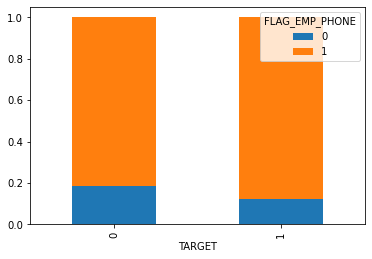

In [ ]:
std = pd.crosstab(data['TARGET'], data['FLAG_EMP_PHONE'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

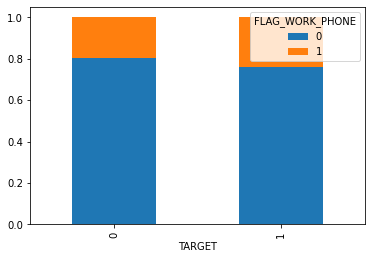

In [ ]:
std = pd.crosstab(data['TARGET'], data['FLAG_WORK_PHONE'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

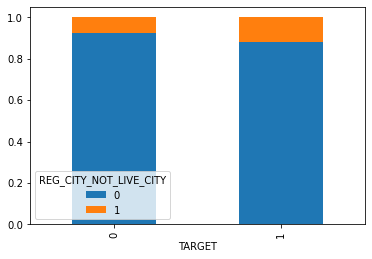

In [ ]:
std = pd.crosstab(data['TARGET'], data['REG_CITY_NOT_LIVE_CITY'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

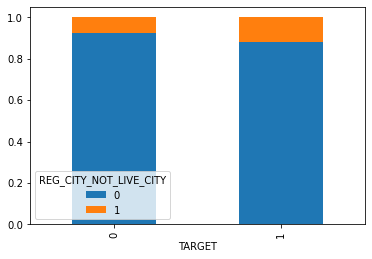

In [ ]:
std = pd.crosstab(data['TARGET'], data['REG_CITY_NOT_LIVE_CITY'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

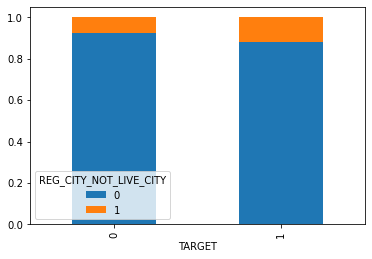

In [ ]:
std = pd.crosstab(data['TARGET'], data['REG_CITY_NOT_LIVE_CITY'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

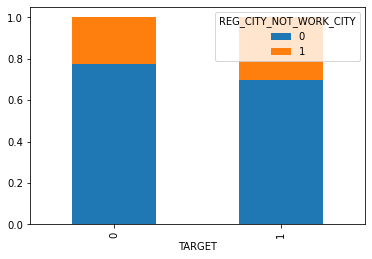

In [ ]:
std = pd.crosstab(data['TARGET'], data['REG_CITY_NOT_WORK_CITY'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

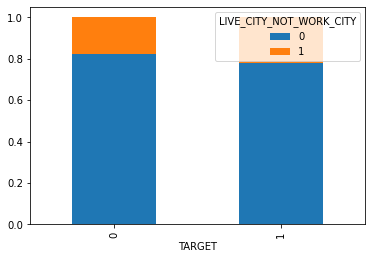

In [ ]:
std = pd.crosstab(data['TARGET'], data['LIVE_CITY_NOT_WORK_CITY'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

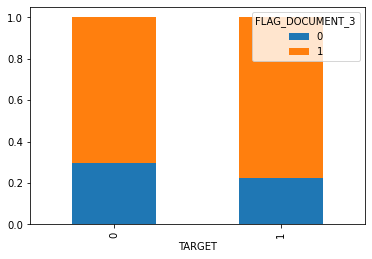

In [ ]:
std = pd.crosstab(data['TARGET'], data['FLAG_DOCUMENT_3'], normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

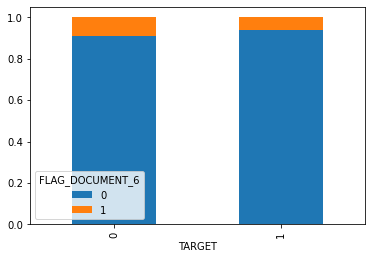

In [ ]:
std = pd.crosstab(data['TARGET'], data['FLAG_DOCUMENT_6'], normalize='index')
std.plot.bar(stacked=True)

In [ ]:
# 学習用、検証用データの作成
# 特徴量を作成する。
X = data.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','FLAG_DOCUMENT_6',]]
clm = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
X = pd.get_dummies(data=X, columns=clm)
X = pd.concat([X,data.CNT_CHILDREN,data.DAYS_EMPLOYED,data.DAYS_LAST_PHONE_CHANGE,data.REGION_POPULATION_RELATIVE], axis = 1)
# X.columnsから、学習データにはあるがテストデータにはない項目を削除する。
# この2項目は、件数も少ない。
# ①CODE_GENDER_XNA・・・4件
# ②NAME_INCOME_TYPE_Maternity leave・・・5件
X = X.drop('CODE_GENDER_XNA', axis=1)
X = X.drop('NAME_INCOME_TYPE_Maternity leave', axis=1)
# データを学習用と検証用に分割する。
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
rf = RandomForestClassifier() # ランダムフォレストモデルのインスタンスを作成
rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習

<ipython-input-532-e74e95590262>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習


RandomForestClassifier()

In [ ]:
y_proba = rf.predict_proba(X_val)

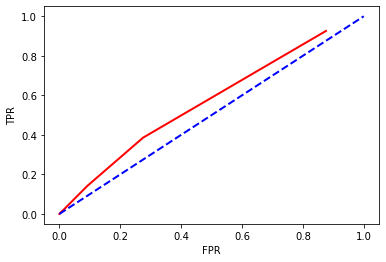

0.423398421122569

In [ ]:
model_proba = np.stack([np.arange(len(X_val)), y_proba[:,1], np.array(y_val).reshape(-1)],1)
model_proba = pd.DataFrame(model_proba, columns=["ID", "predict_proba","target"])
get_tpr_fpr(model_proba)
auc(fpr, tpr)

特徴量エンジニアリング④

変化はあまり見られなかった。次は連続数値項目を特徴量として追加する。

In [ ]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


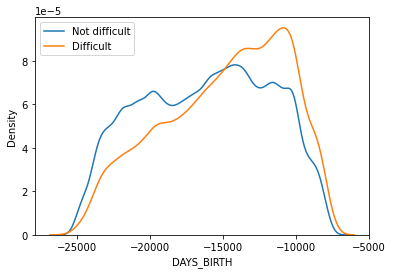

In [ ]:
t0 = data.loc[data["TARGET"]==0]
t1 = data.loc[data["TARGET"]==1]

sns.kdeplot(t0["DAYS_BIRTH"],label="Not difficult")
sns.kdeplot(t1["DAYS_BIRTH"],label="Difficult")
plt.legend()

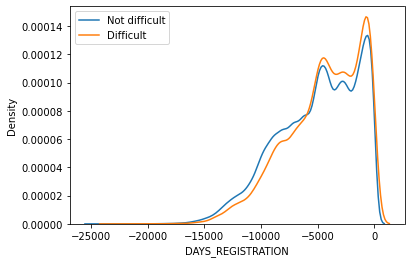

In [ ]:
t0 = data.loc[data["TARGET"]==0]
t1 = data.loc[data["TARGET"]==1]

sns.kdeplot(t0["DAYS_REGISTRATION"],label="Not difficult")
sns.kdeplot(t1["DAYS_REGISTRATION"],label="Difficult")
plt.legend()

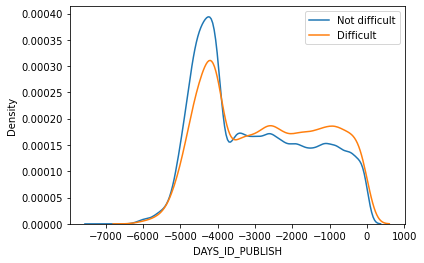

In [ ]:
t0 = data.loc[data["TARGET"]==0]
t1 = data.loc[data["TARGET"]==1]

sns.kdeplot(t0["DAYS_ID_PUBLISH"],label="Not difficult")
sns.kdeplot(t1["DAYS_ID_PUBLISH"],label="Difficult")
plt.legend()

In [ ]:
# 学習用、検証用データの作成
# 特徴量を作成する。
X = data.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
clm = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
X = pd.get_dummies(data=X, columns=clm)
X = pd.concat([X,data.CNT_CHILDREN,data.DAYS_EMPLOYED,data.DAYS_LAST_PHONE_CHANGE,data.REGION_POPULATION_RELATIVE,data.FLAG_EMP_PHONE,data.FLAG_WORK_PHONE,data.REG_CITY_NOT_LIVE_CITY,data.REG_CITY_NOT_WORK_CITY,data.LIVE_CITY_NOT_WORK_CITY,data.FLAG_DOCUMENT_3,data.FLAG_DOCUMENT_6,data.DAYS_BIRTH,data.DAYS_REGISTRATION,data.DAYS_ID_PUBLISH], axis = 1)
# X.columnsから、学習データにはあるがテストデータにはない項目を削除する。
# この2項目は、件数も少ない。
# ①CODE_GENDER_XNA・・・4件
# ②NAME_INCOME_TYPE_Maternity leave・・・5件
X = X.drop('CODE_GENDER_XNA', axis=1)
X = X.drop('NAME_INCOME_TYPE_Maternity leave', axis=1)
# データを学習用と検証用に分割する。
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
rf = RandomForestClassifier() # ランダムフォレストモデルのインスタンスを作成
rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習

<ipython-input-542-e74e95590262>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習


RandomForestClassifier()

In [ ]:
y_proba = rf.predict_proba(X_val)

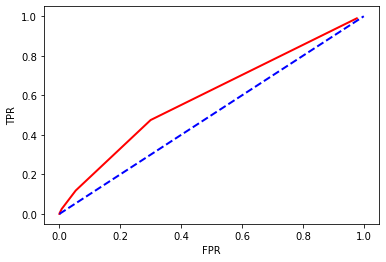

0.423398421122569

In [ ]:
from sklearn import metrics
model_proba = np.stack([np.arange(len(X_val)), y_proba[:,1], np.array(y_val).reshape(-1)],1)
model_proba = pd.DataFrame(model_proba, columns=["ID", "predict_proba","target"])
get_tpr_fpr(model_proba)
auc(fpr, tpr)

特徴量エンジニアリング⑤

AOCの値は向上したと思われる。さらに多値項目を特徴量に追加する。

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

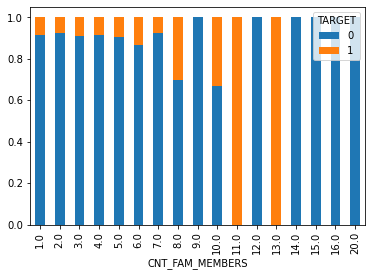

In [ ]:
std = pd.crosstab(data['CNT_FAM_MEMBERS'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='REGION_RATING_CLIENT'>

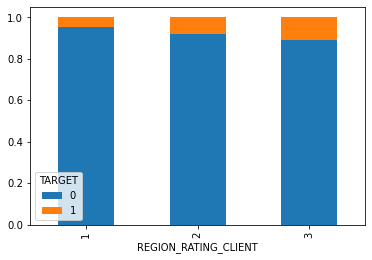

In [ ]:
std = pd.crosstab(data['REGION_RATING_CLIENT'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='REGION_RATING_CLIENT_W_CITY'>

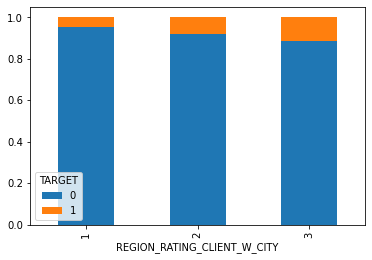

In [ ]:
std = pd.crosstab(data['REGION_RATING_CLIENT_W_CITY'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START'>

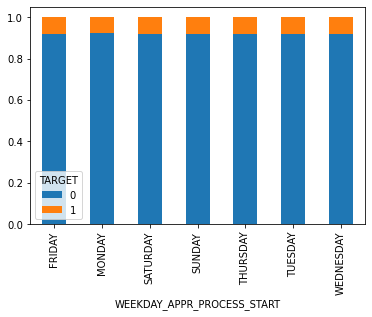

In [ ]:
std = pd.crosstab(data['WEEKDAY_APPR_PROCESS_START'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='HOUR_APPR_PROCESS_START'>

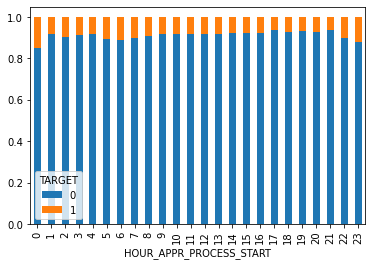

In [ ]:
std = pd.crosstab(data['HOUR_APPR_PROCESS_START'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

<AxesSubplot:xlabel='ORGANIZATION_TYPE'>

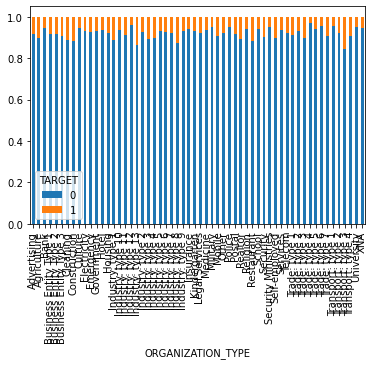

In [ ]:
std = pd.crosstab(data['ORGANIZATION_TYPE'],data['TARGET'],  normalize='index')
std.plot.bar(stacked=True)

In [ ]:
# 学習用、検証用データの作成
# 特徴量を作成する。
X = data.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
clm = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
X = pd.get_dummies(data=X, columns=clm)
X = pd.concat([X,data.CNT_CHILDREN,data.DAYS_EMPLOYED,data.DAYS_LAST_PHONE_CHANGE,data.REGION_POPULATION_RELATIVE,data.FLAG_EMP_PHONE,data.FLAG_WORK_PHONE,data.REG_CITY_NOT_LIVE_CITY,data.REG_CITY_NOT_WORK_CITY,data.LIVE_CITY_NOT_WORK_CITY,data.FLAG_DOCUMENT_3,data.FLAG_DOCUMENT_6,data.DAYS_BIRTH,data.DAYS_REGISTRATION,data.DAYS_ID_PUBLISH,data.CNT_FAM_MEMBERS,data.REGION_RATING_CLIENT,data.REGION_RATING_CLIENT_W_CITY,data.HOUR_APPR_PROCESS_START], axis = 1)
# X.columnsから、学習データにはあるがテストデータにはない項目を削除する。
# この2項目は、件数も少ない。
# ①CODE_GENDER_XNA・・・4件
# ②NAME_INCOME_TYPE_Maternity leave・・・5件
X = X.drop('CODE_GENDER_XNA', axis=1)
X = X.drop('NAME_INCOME_TYPE_Maternity leave', axis=1)
# データを学習用と検証用に分割する。
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
rf = RandomForestClassifier() # ランダムフォレストモデルのインスタンスを作成
rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習

<ipython-input-565-e74e95590262>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train) # ランダムフォレストモデルの重みを学習


RandomForestClassifier()

In [ ]:
y_proba = rf.predict_proba(X_val)

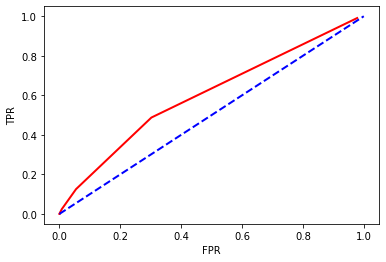

0.423398421122569

In [ ]:
model_proba = np.stack([np.arange(len(X_val)), y_proba[:,1], np.array(y_val).reshape(-1)],1)
model_proba = pd.DataFrame(model_proba, columns=["ID", "predict_proba","target"])
get_tpr_fpr(model_proba)
auc(fpr, tpr)

In [ ]:
X_Id = data2.loc[:,['SK_ID_CURR']]
X_dummy = data2.loc[:,['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
X_dummy = pd.get_dummies(data=X_dummy, columns=clm)
X_test = pd.concat([X_dummy,data2.CNT_CHILDREN,data2.DAYS_EMPLOYED,data2.DAYS_LAST_PHONE_CHANGE,data2.REGION_POPULATION_RELATIVE,data2.FLAG_EMP_PHONE,data2.FLAG_WORK_PHONE,data2.REG_CITY_NOT_LIVE_CITY,data2.REG_CITY_NOT_WORK_CITY,data2.LIVE_CITY_NOT_WORK_CITY,data2.FLAG_DOCUMENT_3,data2.FLAG_DOCUMENT_6,data2.DAYS_BIRTH,data2.DAYS_REGISTRATION,data2.DAYS_ID_PUBLISH,data2.CNT_FAM_MEMBERS,data2.REGION_RATING_CLIENT,data2.REGION_RATING_CLIENT_W_CITY,data2.HOUR_APPR_PROCESS_START], axis = 1)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
X_Id = np.array(X_Id)
submission = pd.DataFrame()
submission['SK_ID_CURR'] = X_Id.reshape(X_Id.shape[0])
submission['TARGET'] = y_pred.reshape((y_pred.shape[0]))
submission.to_csv('sub.csv', index=False)